# Project 2: Predicting the sale price of Bulldozers (regression)

<img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/sklearn-workflow-title.png?raw=1" alt="a 6 step scikit-learn workflow"/>


Kaggle-link: [Blue Book for Bulldozers](https://www.kaggle.com/c/bluebook-for-bulldozers/rules)


**1. Problem definition**

How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?


**2. Data**

The data is downloaded from the Kaggle Blue book for Bulldozers.

The three main datasets are
- Train.csv is the training set, which contains data through the end of 2011.
- Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
- Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.


**3. Evaluation**

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more details on the evaluation of this project see the following link: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

**Note:** The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.


**4. Features**


See the data dictionary providing details of all features

### Code to prevent Colab from disconnecting

```
function ConnectButton(){
    console.log("Connect pushed"); 
    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click() 
}

var colab = setInterval(ConnectButton,60000);
```



##1) Data Preprocessing

- Import the data
- Check for missing values
- Check for formatting of values
- Make sure its all numerical

### Exploring the dataset

In [ ]:
# Install pandas-profiling
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
# Import Training and Validation sets
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Zero_To_Master_Python/01_Data_Science_ML_Bootcamp/03_Projects/02_Bulldozer_Price_Regression/bluebook-for-bulldozers/TrainAndValid.csv", 
                 parse_dates = ["saledate"], error_bad_lines = False, index_col = "saledate")

df.head().T

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


saledate,2006-11-16,2004-03-26,2004-02-26,2011-05-19,2009-07-23
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
fiModelDesc,521D,950FII,226,PC120-6E,S175


**Explore the dataset using pandas-profiling**

In [ ]:
# Instantiate Profile Report
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title = "Bulldozer Sales History from 1989 to 2012")

In [ ]:
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Sort Data-frame by "saledate"
df = df.sort_values(by = ["saledate"], ascending = True)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
saledate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1989-01-17,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,TD20,NaN,NaN,NaN,Medium,"Track Type Tractor, Dozer - 105.0 to 130.0 Hor...",Texas,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Direct Drive,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
1989-01-31,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,A66,NaN,NaN,NaN,NaN,Wheel Loader - 120.0 to 135.0 Horsepower,Florida,WL,Wheel Loader,NaN,OROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1989-01-31,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,D7,G,NaN,NaN,Large,"Track Type Tractor, Dozer - 190.0 to 260.0 Hor...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
1989-01-31,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,A62,NaN,NaN,NaN,NaN,Wheel Loader - Unidentified,Florida,WL,Wheel Loader,NaN,EROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1989-01-31,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,D3,B,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


### Feature Engineering (Datetime)

**Make a copy of the original Data-frame**

We make a copy of the original dataframe so when we manipulate the copy, we've still our original data

In [ ]:
df_temp = df.copy()

**Access Attributes of DateTimeIndex**

In [ ]:
df_temp["SaleYear"] = df_temp.index.year
df_temp["SaleMonth"] = df_temp.index.month
df_temp["SaleDay"] = df_temp.index.day
df_temp["SaleQuarter"] = df_temp.index.quarter
df_temp["DayOfWeek"] = df_temp.index.dayofweek
df_temp["DayOfYear"] = df_temp.index.dayofyear
df_temp.head().T


saledate,1989-01-17,1989-01-31,1989-01-31,1989-01-31,1989-01-31
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


### Turn Strings into Categories (Numerical Transformation-pt1)

In [ ]:
# Inspect features for their dtypes
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 412698 entries, 1989-01-17 to 2012-04-28
Data columns (total 52 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74

**Convert string to categories**

in order to transform string columns into numerical numbers, we must determine the dtype of that column and find categories: https://pandas.pydata.org/docs/reference/general_utility_functions.html

Changing strings into categories might look the same after transforming the values. However, under the hood, pandas assigns numbers to every string and therefore treats them as a number (see doc: https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html)


In [ ]:
# Iterates over the DataFrame columns, returning a tuple with the column name and the content as a Series
for label, content in df_temp.items():
  # Check whether the provided array or dtype is of the string dtype.
  if pd.api.types.is_string_dtype(content):
    df_temp[label] = content.astype("category").cat.as_ordered()

df_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 412698 entries, 1989-01-17 to 2012-04-28
Data columns (total 52 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescri

In [ ]:
# Have a look at the category number under the hood
df_temp["state"].cat.codes

saledate
1989-01-17    43
1989-01-31     8
1989-01-31     8
1989-01-31     8
1989-01-31     8
              ..
2012-04-28     4
2012-04-28     4
2012-04-28     4
2012-04-28     4
2012-04-28     4
Length: 412698, dtype: int8

### Fill Missing Numerical Values (Numerical Transformation - pt2)

When filling missing numerical values, we create an additional column at the end of our dataset, in order to keep the information that this column originally contains missing values.

In [ ]:
for label, content in df_temp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      # Create new binary column (True/False) that keeps information that data was missing
      df_temp[label+"_is_missing"] = pd.isnull(content)
      # Fill missing values using the Median
      df_temp[label] = content.fillna(content.median())


In [ ]:
# Check if there's any null numeric values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 412698 entries, 1989-01-17 to 2012-04-28
Data columns (total 60 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   SalesID                              412698 non-null  int64   
 1   SalePrice                            412698 non-null  float64 
 2   MachineID                            412698 non-null  int64   
 3   ModelID                              412698 non-null  int64   
 4   datasource                           412698 non-null  int64   
 5   auctioneerID                         412698 non-null  float64 
 6   YearMade                             412698 non-null  int64   
 7   MachineHoursCurrentMeter             412698 non-null  float64 
 8   UsageBand                            73670 non-null   category
 9   fiModelDesc                          412698 non-null  category
 10  fiBaseModel                          412698 non-null

In [ ]:
# Check how many values are filled
df_temp["auctioneerID_is_missing"].value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

### Fill Missing Categorical Values (Numerical Transformation - pt3)



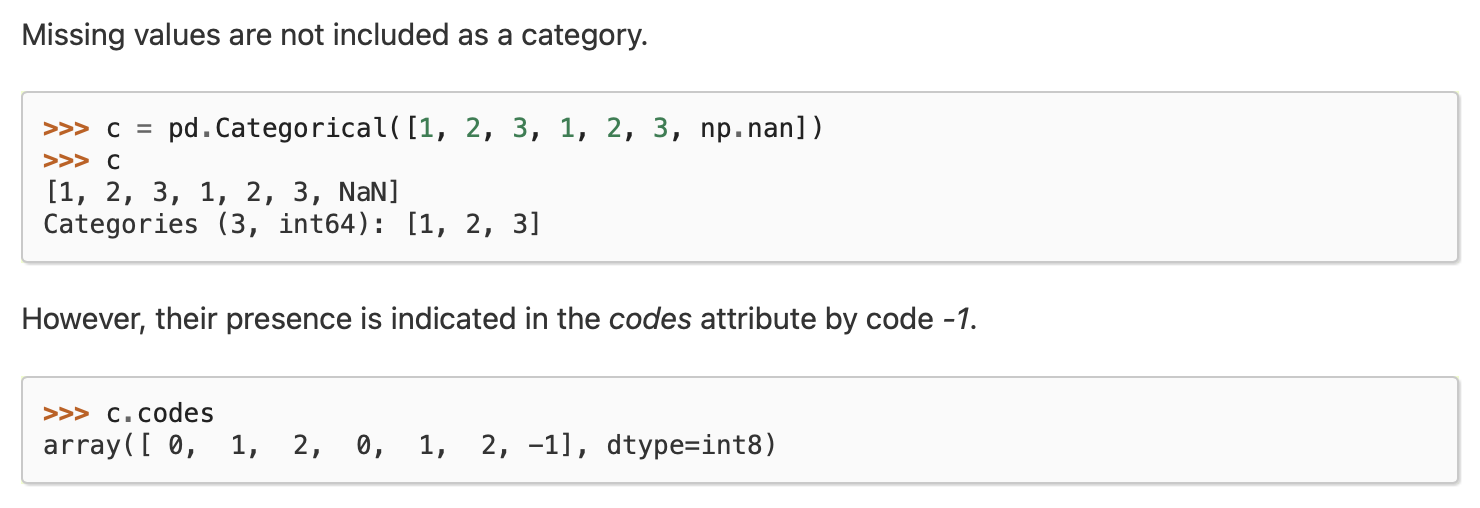

In [ ]:
for label, content in df_temp.items():
  if not pd.api.types.is_numeric_dtype(content):
    # Add binary column to indicate whether sample had missing value
    df_temp[label+"_is_missing"] = pd.isnull(content)
    # Missing values are not included as a category. However, their presence is indicated in the codes attribute by code -1.
    df_temp[label] = pd.Categorical(content).codes + 1

In [ ]:
# Check if there are any missing values
df_temp.isnull().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 104, dtype: int64

In [ ]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,...,fiModelSeries_is_missing,fiModelDescriptor_is_missing,ProductSize_is_missing,fiProductClassDesc_is_missing,state_is_missing,ProductGroup_is_missing,ProductGroupDesc_is_missing,Drive_System_is_missing,Enclosure_is_missing,Forks_is_missing,Pad_Type_is_missing,Ride_Control_is_missing,Stick_is_missing,Transmission_is_missing,Turbocharged_is_missing,Blade_Extension_is_missing,Blade_Width_is_missing,Enclosure_Type_is_missing,Engine_Horsepower_is_missing,Hydraulics_is_missing,Pushblock_is_missing,Ripper_is_missing,Scarifier_is_missing,Tip_Control_is_missing,Tire_Size_is_missing,Coupler_is_missing,Coupler_System_is_missing,Grouser_Tracks_is_missing,Hydraulics_Flow_is_missing,Track_Type_is_missing,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
saledate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1989-01-17,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,1744,0,0,0,4,47,44,5,5,0,6,0,0,0,0,3,0,0,0,0,0,1,0,2,0,0,0,0,0,0,...,True,True,False,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True
1989-01-31,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,559,0,0,0,0,60,9,6,6,0,6,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,...,True,True,True,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False
1989-01-31,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,713,59,0,0,2,50,9,5,5,0,6,0,0,0,0,8,0,0,0,0,0,1,0,2,0,0,0,0,0,0,...,True,True,False,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True
1989-01-31,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,558,0,0,0,0,74,9,6,6,0,1,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,...,True,True,True,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False
1989-01-31,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,683,21,0,0,0,51,9,5,5,0,6,0,0,0,0,8,0,0,0,0,0,1,0,2,0,0,0,0,0,0,...,True,True,True,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True


## 2) Setup for Modelling

### Pick RandomForestRegressor

In [ ]:
# Import sklearn classes
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_curve

### Splitting Data

We need to split the data into train and validation sets.
- **train set** through the end of 2011
- **validation set** from 01.01.2012 to 30.04.2012

**Splitting into Train and Validation Set**

In [ ]:
# Create df_train
df_train = df_temp.loc["1989-01-17": "2011-12-31"]

# Create df_valid
df_valid = df_temp.loc["2012-01-01":"2012-04-30"]
len(df_valid), len(df_train)

(11573, 401125)

**Split into X and y**

In [ ]:
# Split training set into X and y
X_train = df_train.drop("SalePrice", axis = 1)
y_train = df_train["SalePrice"]

# Split validation set into X and y
X_valid = df_valid.drop("SalePrice", axis = 1)
y_valid = df_valid["SalePrice"]

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 103), (401125,), (11573, 103), (11573,))

### Define Evaluation Metrics

The challenge requires to evaluate our machine learning model using the RMSLE (**Root-Mean-Squared-Log-Error**)

"The **`mean_squared_log_error`** function computes a risk metric corresponding to the expected value of the squared logarithmic (quadratic) error or loss."

**Create own Evaluation metrics**

In [ ]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_valid, y_preds):
  """
  Calculate root mean squared log error between predictions and true labels.
  """
  return np.sqrt(mean_squared_log_error(y_valid, y_preds))

In [ ]:
def show_scores(model, X_train, y_train, X_valid, y_valid):
  train_preds = model.predict(X_train)
  valid_preds = model.predict(X_valid)
  scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
            "Valid MAE": mean_absolute_error(y_valid, valid_preds),
            "Training RMSLE": rmsle(y_train, train_preds),
            "Valid RMSLE": rmsle(y_valid, valid_preds),
            "Training R^2": r2_score(y_train, train_preds),
            "Valid R^2": r2_score(y_valid, valid_preds)}
  return scores

## 3) Base-Model

- Pick an ML Model
- Split the data
- Fit the Base-model
- Evaluate initially

Keep in mind: How can I reduce the time between my experiments (model to model)

### Fit a Machine Learning Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Set random seed
np.random.seed(42)

# Instantiate the model
model = RandomForestRegressor(n_jobs = -1)
model.fit(X_train, y_train)

### Reduce Dataset for Experiments

Computing model after model on the entire dataset takes way too much time. THe time between these experiments can be reduced by only taking a small portion of the entire dataset. This can be done through
- Slicing
- **`max_samples`** parameter: If bootstrap is True, the number of samples to draw from X to train each base estimator

Cutting down on the max number of samples (max_samples) each estimator can see

In [ ]:
# Instantiate experimental model
model = RandomForestRegressor(n_jobs = -1,
                              random_state = 42,
                              max_samples = 10000)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make Predictions
y_preds = model.predict(X_valid)

In [ ]:
show_scores(model, X_train, y_train, X_valid, y_valid)

{'Training MAE': 5561.388405534433,
 'Training RMSLE': 0.2577567498810572,
 'Training R^2': 0.8606925044474127,
 'Valid MAE': 7185.500517584032,
 'Valid RMSLE': 0.29323706525838905,
 'Valid R^2': 0.8312834143812906}

## 3) RSCV-Model

- Tuning Hyperparameters using the RandomizedSearchCV() Method

### RandomizedSearchCV: 10-iters

**Parameters**
- **`n_estimators`**: The number of trees in the forest.
- **`max_depth`** The maximum depth of the tree.
- **`min_samples_split`** The minimum number of samples required to split an internal node
- **`min_samples_leaf`** The minimum number of samples required to be at a leaf node
- **`max_features`** The number of features to consider when looking for the best split
- **`max_samples`** If bootstrap is True, the number of samples to draw from X to train each base estimator.

**1. Setup the RandomizedSearch-Grid**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Set up different RandomForestRegressor hyperparameters
rs_grid = {"n_estimators": np.arange(10, 100, 10),
             "max_depth": [None, 3, 5, 10],
             "min_samples_split": np.arange(2, 20, 2),
             "min_samples_leaf": np.arange(1, 20, 2),
             "max_features": [0.5, 1, "sqrt", "auto"],
             "max_samples": [10000]}

**2. Test Model performance on 10 iterations**

In [ ]:
# Instantiate RandomizedSearchCV-Model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1,
                                                      random_state = 42),
                                param_distributions = rs_grid,
                                # Number of combinations out of the rand_grid params
                                n_iter = 10,
                                cv = 5,
                                verbose = 2)

# Fit the model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

**3. Evaluate best Hyperparameters**

In [ ]:
# Find the best model hyperparameters
rs_model.best_params_

{'max_depth': 10,
 'max_features': 0.5,
 'max_samples': 10000,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 20}

In [ ]:
# Evaluate the RandomizedSearchCV-Model
show_scores(rs_model, X_train, y_train, X_valid, y_valid)

{'Training MAE': 6984.059287925385,
 'Training RMSLE': 0.31102059893775014,
 'Training R^2': 0.7940381217140847,
 'Valid MAE': 8084.0665216546495,
 'Valid RMSLE': 0.3295023256224181,
 'Valid R^2': 0.7967687447270384}

In [ ]:
# Check scores using the best params
bestrs_model = RandomForestRegressor(n_jobs = -1,
                                   max_depth = 10,
                                   max_features = 0.5,
                                   max_samples = 10000,
                                   min_samples_leaf = 1,
                                   min_samples_split = 8,
                                   n_estimators = 20)

# Fit the best_model
bestrs_model.fit(X_train, y_train)

# Evaluate best_model
show_scores(bestrs_model, X_train, y_train, X_valid, y_valid)

{'Training MAE': 6966.561065772678,
 'Training RMSLE': 0.3107390836918555,
 'Training R^2': 0.7959322196169759,
 'Valid MAE': 8084.857704328975,
 'Valid RMSLE': 0.3271599572663519,
 'Valid R^2': 0.799408300612991}

### RandomizedSearchCV: 250-iters

Since GridSearchCV is not technically feasible, i.e. running the GridSearchCV on the rs_grid takes around 5,5 days since fitting 5 folds for each of 12960 candidates, totalling 64800 fits.

Therefore, I adjust the number of iterations in the RandomizedSearchCV equal to 300. Therefore the RandomizedSearchCV looks for 250 distinct combinations of the params in the grid 

In [ ]:
# Instantiate RandomizedSearchCV-Model
rs2_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1,
                                                      random_state = 42),
                                param_distributions = rs_grid,
                                n_iter = 250, # Number of combinations out of the rand_grid params
                                cv = 5,
                                verbose = 3)

# Fit the model
rs2_model.fit(X_train, y_train)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=250,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=1)

In [ ]:
# Find the best model hyperparameters
rs2_model.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'max_samples': 10000,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 70}

In [ ]:
# Evaluate the RandomizedSearchCV-Model
show_scores(rs2_model, X_train, y_train, X_valid, y_valid)

{'Training MAE': 5706.791825085914,
 'Training RMSLE': 0.2627548094286938,
 'Training R^2': 0.852933353651298,
 'Valid MAE': 7294.000135807764,
 'Valid RMSLE': 0.2968304227014101,
 'Valid R^2': 0.8257899247754522}

### Evaluation using best_params_

In [ ]:
# Instantiate ideal_model using best params
ideal_model = RandomForestRegressor(n_jobs = -1,
                                    random_state = 42,
                                    max_depth = None,
                                    max_features = "auto",
                                    min_samples_leaf = 1,
                                    min_samples_split = 10,
                                    n_estimators = 70,
                                    max_samples = None)

# Fit the model on X_train and y_train
ideal_model.fit(X_train, y_train)

# Compute Evaluation metrics
show_scores(ideal_model, X_train, y_train, X_valid, y_valid)

{'Training MAE': 2467.09609641356,
 'Training RMSLE': 0.12448759543230246,
 'Training R^2': 0.9700075116931165,
 'Valid MAE': 6115.958387595645,
 'Valid RMSLE': 0.254217641504248,
 'Valid R^2': 0.872754784905422}

Reduced evaluation metric RMSLE from 0.3034 to 0.2542 (Kaggle rank: 50)

## 4) GSCV-Model
- Use the best params from RSCV and reduce Grid space

**1. Create GridSearchCV**

Build GSCV around best_params from RSCV:



```
# Find the best model hyperparameters
rs2_model.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'max_samples': 10000,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 70}
```



### GridSearchCV

Decision Trees make locally optimal decisions at each node by computing which feature and which value of that feature best splits the observations up to that point.

**Hyperparameter Explanation**

**1. `n_estimators`**: 
- By building forests with a large number of trees (high number of estimators) we can create a more robust aggregate model with less variance, at the cost of a greater training time.
-  Best: **keep at 100**
- Increasing the number of trees generally reduces model error at the cost of a higher training time.


**2. `criterion`**: 
- The general rule is to take MSE if you don’t have many outliers in your data, as it penalises highly those observations that are far away from the mean.


**3. `max_depth`**: 
- Increasing the Depth of individual trees increases the possible number of feature/value combinations that are taken into account. 
- Set this parameter to a reasonable amount and tune it a little bit if you want, but changes around a reasonable value do not impact the performance of your forest greatly.

**4. `max_features`**: 
- The best value of this hyperparameter is hard to pick without experimentation, so the best way to obtain it is using a Grid Search with Cross Validation.
- If your data set has very clean, polished, and quality features, then the value of the number of random features on each split on can be relatively small
-  all the considered features will be cool. If you have a lot of noisy data, then this value should probably be higher, to increase the chances of a quality feature being included in the contest.
- **"auto"**: This will consider all the features of your data.
- **"sqrt"**: This option will take square root of the total number of features in individual each split
- **0.2 (decimal value between 0 and 1)**: This option allows the random forest to take a % of variables in individual split

In [ ]:
# Set up different RandomForestRegressor hyperparameters
gs_grid = {"n_estimators": [100, 150],
           "max_depth": [None],
           "min_samples_split": [6, 10, 14],
           "min_samples_leaf": [1, 2, 5],
           "max_features": [0.4, 0.7, "auto"]}

# Instantiate RandomForestRegressor
model = RandomForestRegressor(n_jobs = -1,
                              random_state = 42)
# Create GSCV-Model
from sklearn.model_selection import GridSearchCV
gscv_model = GridSearchCV(estimator = model,
                          param_grid = gs_grid,
                          cv = 5,
                          verbose = 2)

# Fit the GSCV-Model
gscv_model.fit(X_train, y_train)

In [ ]:
# Inspect best Hyperparamters
gscv_model.best_params_

{'max_depth': None,
 'max_features': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [ ]:
# Assess scores
show_scores(gscv_model, X_train, y_train, X_valid, y_valid)

{'Training MAE': 2022.3745332986316,
 'Training RMSLE': 0.10519714837847537,
 'Training R^2': 0.979574266847992,
 'Valid MAE': 5999.456616188253,
 'Valid RMSLE': 0.2495965569892691,
 'Valid R^2': 0.8805230905237096}

Improved evaluation metric RMSLE from 0.3034 to 0.2542 to 0.2496 (Kaggle rank: 50 to rank: 37)

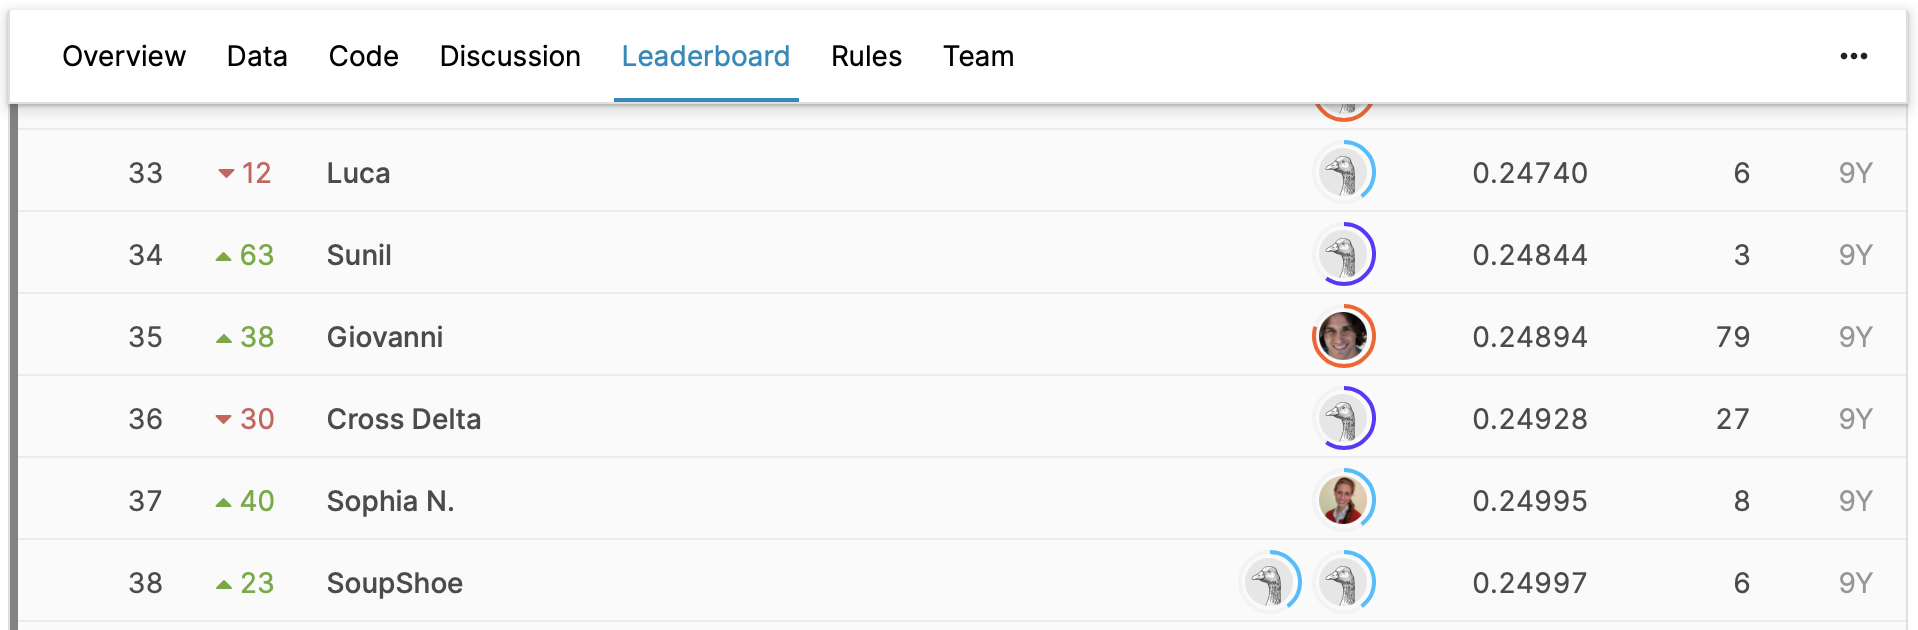

Out of 474 teams this means, that the RF-algorithm scores above the top 8%!!!

**Based on GSCV- and GS2CV-Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate Regressor
model_combi = RandomForestRegressor(n_estimators = 40,
                                    max_depth = None,
                                    min_samples_leaf = 1,
                                    min_samples_split = 4,
                                    max_features = "auto")

# Fit Model
model_combi.fit(X_train, y_train)

# Evaluate Model
show_scores(model_combi, X_train, y_train, X_valid, y_valid)

{'Training MAE': 1788.5671853480014,
 'Training RMSLE': 0.09555011245153451,
 'Training R^2': 0.9833114523154369,
 'Valid MAE': 6130.264028915277,
 'Valid RMSLE': 0.25666871256062956,
 'Valid R^2': 0.8711707686042263}

RMSLE = 0.2566 remains worse compared to RMSLE = 0.2496 of the first GSCV-model


## 5) XGBRF-Model
- It is generally believed that boosting based algorithms like Gradient Boosting and XGBoost performs better than algorithms based on bagging. So its time to test how boosting algorithms can help us in improving our test score.

- XGBoost is an open source library providing a high-performance implementation of gradient boosted decision trees.
- With a regular machine learning model, like a decision tree, we’d simply train a single model on our dataset and use that for prediction. Even if we build an ensemble, all of the models are trained and applied to our data separately.
- **Boosting**, on the other hand, takes a more iterative approach. Rather than training all of the models in isolation of one another, boosting trains models in succession, with each new model being trained to correct the errors made by the previous ones. 

- https://machinelearningmastery.com/random-forest-ensembles-with-xgboost/
- https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn
- https://www.kaggle.com/felipefiorini/xgboost-hyper-parameter-tuning



## Z) Make Predictions on the Test data

- Right now, we evaluated our model on the valid-set.
-

In [ ]:
# Import the test data
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Zero_To_Master_Python/01_Data_Science_ML_Bootcamp/03_Projects/02_Bulldozer_Price_Regression/bluebook-for-bulldozers/Test.csv", parse_dates = ["saledate"], error_bad_lines = False, index_col = ["saledate"])

test_df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
saledate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-05-03,1227829,1006309,3168,121,3,1999,3688.0,Low,580G,580,G,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Wyoming,BL,Backhoe Loaders,Two Wheel Drive,OROPS,Yes,None or Unspecified,No,Standard,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-10,1227844,1022817,7271,121,3,1000,28555.0,High,936,936,NaN,NaN,NaN,Medium,Wheel Loader - 135.0 to 150.0 Horsepower,Virginia,WL,Wheel Loader,NaN,EROPS,Yes,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2012-05-10,1227847,1031560,22805,121,3,2004,6038.0,Medium,EC210BLC,EC210,B,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 21.0 to 24.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
2012-05-10,1227848,56204,1269,121,3,2006,8940.0,High,330CL,330,C,NaN,L,Large / Medium,"Hydraulic Excavator, Track - 33.0 to 40.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
2012-05-10,1227863,1053887,22312,121,3,2005,2286.0,Low,650K,650,K,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Hydrostatic,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [ ]:
test_df.sort_values("saledate", inplace = True)

test_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12457 entries, 2012-05-01 to 2012-11-16
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   12457 non-null  int64  
 1   MachineID                 12457 non-null  int64  
 2   ModelID                   12457 non-null  int64  
 3   datasource                12457 non-null  int64  
 4   auctioneerID              12457 non-null  int64  
 5   YearMade                  12457 non-null  int64  
 6   MachineHoursCurrentMeter  2129 non-null   float64
 7   UsageBand                 1834 non-null   object 
 8   fiModelDesc               12457 non-null  object 
 9   fiBaseModel               12457 non-null  object 
 10  fiSecondaryDesc           8482 non-null   object 
 11  fiModelSeries             2006 non-null   object 
 12  fiModelDescriptor         3024 non-null   object 
 13  ProductSize               6048 non-null   ob

In [ ]:
# Check for missing values in test data

test_df.isnull().sum()/len(test_df)

SalesID                         0.0
MachineID                       0.0
ModelID                         0.0
datasource                      0.0
auctioneerID                    0.0
                               ... 
Backhoe_Mounting_is_missing     0.0
Blade_Type_is_missing           0.0
Travel_Controls_is_missing      0.0
Differential_Type_is_missing    0.0
Steering_Controls_is_missing    0.0
Length: 102, dtype: float64

In [ ]:
# Define preprocessing data function
def preprocess_data(df):

  """
  Perform all preprocessing steps that we did on the training set
  """

  # 1. Create new columns for DateTimeIndex Attributes
  df["SaleYear"] = df.index.year
  df["SaleMonth"] = df.index.month
  df["SaleDay"] = df.index.day
  df["SaleQuarter"] = df.index.quarter
  df["DayOfWeek"] = df.index.dayofweek
  df["DayOfYear"] = df.index.dayofyear

  # 2. Turn Strings Intor Categories
  for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
      df[label] = content.astype("category").cat.as_ordered()

  # 3. Fill missing numerical values
    if pd.api.types.is_numeric_dtype(content):
      if pd.isnull(content).sum():
        df[label+"_is_missing"] = pd.isnull(content)
        df[label] = content.fillna(content.median())

  # 4. Fill missing categorical values
    if not pd.api.types.is_numeric_dtype(content):
        df[label+"_is_missing"] = pd.isnull(content)
        df[label] = pd.Categorical(content).codes+ 1

  return df

In [ ]:
test_df = preprocess_data(test_df)

test_df.head()


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,...,fiModelSeries_is_missing,fiModelDescriptor_is_missing,ProductSize_is_missing,fiProductClassDesc_is_missing,state_is_missing,ProductGroup_is_missing,ProductGroupDesc_is_missing,Drive_System_is_missing,Enclosure_is_missing,Forks_is_missing,Pad_Type_is_missing,Ride_Control_is_missing,Stick_is_missing,Transmission_is_missing,Turbocharged_is_missing,Blade_Extension_is_missing,Blade_Width_is_missing,Enclosure_Type_is_missing,Engine_Horsepower_is_missing,Hydraulics_is_missing,Pushblock_is_missing,Ripper_is_missing,Scarifier_is_missing,Tip_Control_is_missing,Tire_Size_is_missing,Coupler_is_missing,Coupler_System_is_missing,Grouser_Tracks_is_missing,Hydraulics_Flow_is_missing,Track_Type_is_missing,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
saledate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-05-01,4317459,2295526,8132,172,1,1998,4359.0,3,397,148,0,0,0,0,42,3,3,3,0,3,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,1,1,3,...,True,True,True,False,False,False,False,True,False,False,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True
2012-05-01,4249784,1745722,3178,172,1,1995,4489.0,2,509,180,60,0,0,0,2,3,1,1,2,2,1,2,1,1,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2012-05-01,4392603,2283116,18111,172,1,2004,2126.0,2,906,320,0,0,0,0,1,3,1,1,4,2,1,2,3,1,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2012-05-01,4274831,2288988,3783,172,1,2001,9115.0,3,824,290,25,0,0,0,56,3,6,6,0,2,2,0,3,0,0,0,0,0,0,0,1,0,0,0,0,7,3,0,0,0,...,True,True,True,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False
2012-05-01,4362801,2300591,16490,172,1,2006,885.0,2,1513,610,41,9,0,5,6,3,4,4,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,...,False,True,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True


In [ ]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,...,fiModelSeries_is_missing,fiModelDescriptor_is_missing,ProductSize_is_missing,fiProductClassDesc_is_missing,state_is_missing,ProductGroup_is_missing,ProductGroupDesc_is_missing,Drive_System_is_missing,Enclosure_is_missing,Forks_is_missing,Pad_Type_is_missing,Ride_Control_is_missing,Stick_is_missing,Transmission_is_missing,Turbocharged_is_missing,Blade_Extension_is_missing,Blade_Width_is_missing,Enclosure_Type_is_missing,Engine_Horsepower_is_missing,Hydraulics_is_missing,Pushblock_is_missing,Ripper_is_missing,Scarifier_is_missing,Tip_Control_is_missing,Tire_Size_is_missing,Coupler_is_missing,Coupler_System_is_missing,Grouser_Tracks_is_missing,Hydraulics_Flow_is_missing,Track_Type_is_missing,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
saledate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1989-01-17,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,0,0,0,4,47,44,5,5,0,6,0,0,0,0,3,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,...,True,True,False,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True
1989-01-31,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,0,0,0,0,60,9,6,6,0,6,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,...,True,True,True,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False
1989-01-31,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,59,0,0,2,50,9,5,5,0,6,0,0,0,0,8,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,...,True,True,False,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True
1989-01-31,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,0,0,0,0,74,9,6,6,0,1,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,...,True,True,True,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False
1989-01-31,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,21,0,0,0,51,9,5,5,0,6,0,0,0,0,8,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,...,True,True,True,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True


**Check difference in column number between test_df and X_train**

In [ ]:
# Find the difference of test_df and X_train in terms of columns
[col for col in X_train if not col in test_df]

['auctioneerID_is_missing']

In [ ]:
# Manually add the auctioneerID_is_missing column
test_df["auctioneerID_is_missing"] = False
test_df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,...,fiModelDescriptor_is_missing,ProductSize_is_missing,fiProductClassDesc_is_missing,state_is_missing,ProductGroup_is_missing,ProductGroupDesc_is_missing,Drive_System_is_missing,Enclosure_is_missing,Forks_is_missing,Pad_Type_is_missing,Ride_Control_is_missing,Stick_is_missing,Transmission_is_missing,Turbocharged_is_missing,Blade_Extension_is_missing,Blade_Width_is_missing,Enclosure_Type_is_missing,Engine_Horsepower_is_missing,Hydraulics_is_missing,Pushblock_is_missing,Ripper_is_missing,Scarifier_is_missing,Tip_Control_is_missing,Tire_Size_is_missing,Coupler_is_missing,Coupler_System_is_missing,Grouser_Tracks_is_missing,Hydraulics_Flow_is_missing,Track_Type_is_missing,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
saledate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-05-01,4317459,2295526,8132,172,1,1998,4359.0,3,397,148,0,0,0,0,42,3,3,3,0,3,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,1,1,3,...,True,True,False,False,False,False,True,False,False,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False
2012-05-01,4249784,1745722,3178,172,1,1995,4489.0,2,509,180,60,0,0,0,2,3,1,1,2,2,1,2,1,1,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False
2012-05-01,4392603,2283116,18111,172,1,2004,2126.0,2,906,320,0,0,0,0,1,3,1,1,4,2,1,2,3,1,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False
2012-05-01,4274831,2288988,3783,172,1,2001,9115.0,3,824,290,25,0,0,0,56,3,6,6,0,2,2,0,3,0,0,0,0,0,0,0,1,0,0,0,0,7,3,0,0,0,...,True,True,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False
2012-05-01,4362801,2300591,16490,172,1,2006,885.0,2,1513,610,41,9,0,5,6,3,4,4,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,...,True,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True,False


In [ ]:
test_df.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Stick_Length_is_missing', 'Thumb_is_missing',
       'Pattern_Changer_is_missing', 'Grouser_Type_is_missing',
       'Backhoe_Mounting_is_missing', 'Blade_Type_is_missing',
       'Travel_Controls_is_missing', 'Differential_Type_is_missing',
       'Steering_Controls_is_missing', 'auctioneerID_is_missing'],
      dtype='object', length=103)

Our test Data-frame has now the same shape as the X_train Data-frame. We can now continue doing predictions

**Make Predictions using test_df**

In [ ]:
test_preds = ideal_model.predict(test_df)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


**Create Data-Frame according to submission rules**

In [ ]:
# Create Data-frame
df_preds = pd.DataFrame()
# First column equals SalesID
df_preds["SalesID"] = test_df["SalesID"]
# Second column equals SalePrice predicted by our model
df_preds["SalePrice"] = test_preds
# Inspect result
df_preds.head(10)

,SalesID,SalePrice
saledate,,
2012-05-01,4317459,10882.707908
2012-05-01,4249784,16585.189217
2012-05-01,4392603,23236.050910
2012-05-01,4274831,26086.338587
2012-05-01,4362801,11045.708443
2012-05-01,4393021,54397.672548
2012-05-01,4320212,21139.156191
2012-05-01,4290711,48222.095880
2012-05-01,4320575,23846.581692


**Export the Test predictions**

In [ ]:
df_preds.to_csv("/content/drive/MyDrive/Colab Notebooks/Zero_To_Master_Python/01_Data_Science_ML_Bootcamp/03_Projects/02_Bulldozer_Price_Regression/Test_Predictions.csv")

## 6) Communication: Feature importance
Feature importance seeks to lay out those features of most influence to the model algorithm when it comes to predicting the SalePrice

In [ ]:
len(ideal_model.feature_importances_)

103

In [ ]:
def plot_features(features, importances, n = 20):
  df = pd.DataFrame({"Features": features,
                     "Importance": importances,})
  df = df.sort_values("Importance", ascending = False)
  df = df.reset_index(drop = True)

  #Plot Dataframe
  import matplotlib.pyplot as plt
  import seaborn as sns
  plt.style.use("ggplot")
  fig, ax = plt.subplots(nrows = 1,
                         ncols = 1,
                         figsize = (15,10))
  sns.barplot(x = df["Importance"], y = df["Features"][:n], palette = "CMRmap")
  plt.show()

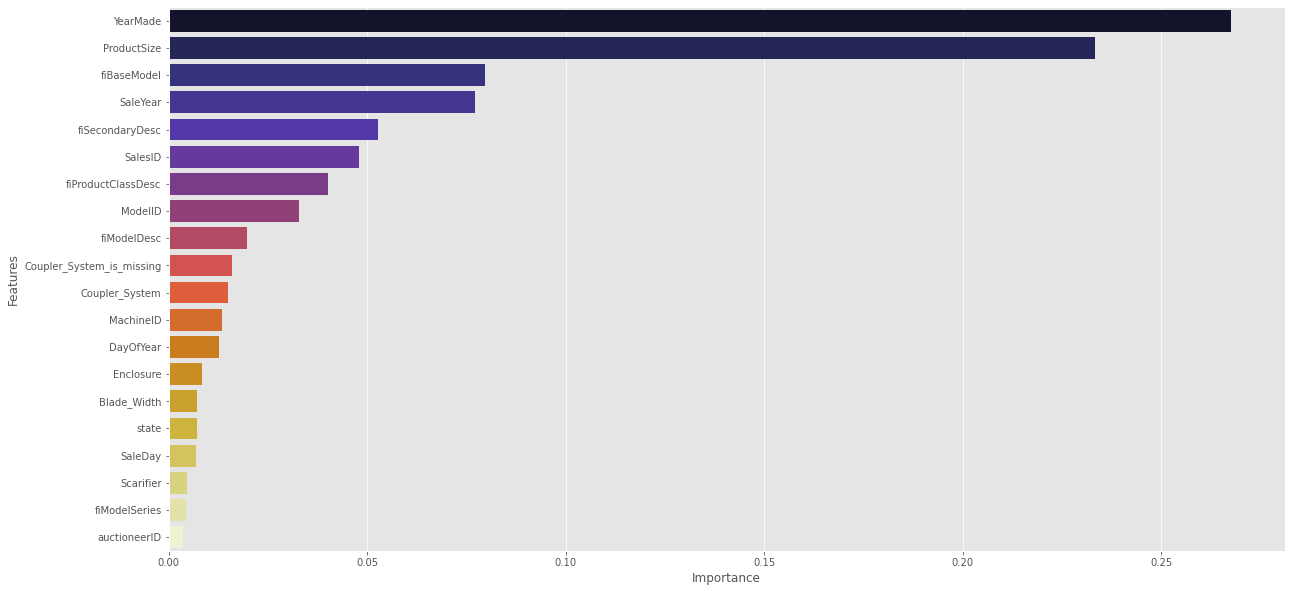

In [ ]:
plot_features(X_train.columns, ideal_model.feature_importances_, n = 20)

- Useful for some presentation to the client
- Does these features make sense for predicting the target value?
- This information might influence how the client goes about collecting data in the future

Resources#- CatBo